### First step is to load in the modules we will be using to work with the data. This is a template of commonly used Data Science modules that we may or may not use. 

In [2]:
# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# Load libraries
import pandas
from pandas.io.json import json_normalize 
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

# sklearn 
from sklearn.preprocessing import Normalizer
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

#requests
import requests

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

pd.options.display.max_columns = None
pd.options.display.max_rows = None


### Now we focus on accessing the API and creating a data set that will fuel our predictions. 

In [5]:
# get data

##create year variables
year17 = str('2017REG')

year18 = str('2018REG')

year19 = str('2019REG')

##create key variable
key = str('1f1d70692bf443f2bb64f367f0a14ff1')

##create requests for all historical data
res17 = requests.get("https://api.sportsdata.io/v3/nfl/scores/json/TeamSeasonStats/" + year17 + "?key="+key+"").json()

res18 = requests.get("https://api.sportsdata.io/v3/nfl/scores/json/TeamSeasonStats/" + year18 + "?key="+key+"").json()

res19 = requests.get("https://api.sportsdata.io/v3/nfl/scores/json/TeamSeasonStats/" + year19 + "?key="+key+"").json()

##normalizae the json responses 
df17 = json_normalize(res17)

df18 = json_normalize(res18)

df19 = json_normalize(res19)

##create frames variable to prepare for concatenation of normalized json responses
frames = [df17, df18, df19]

## concatenate normalized json responses into one dataframe
result = pd.concat(frames)

##number of print choices to confirm 
print(result.info())
#print(result.describe())
#print(result.head())
#print(result.columns.tolist()) #this prints all columns names

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 0 to 31
Columns: 224 entries, SeasonType to GlobalTeamID
dtypes: float64(30), int64(190), object(4)
memory usage: 168.8+ KB
None


### Now that we have all the data, we need to understand how our target, "Score", relates to the rest of the attributes in this data set. We are going to achieve this by building a correlation matrix, which shows how each attribute relates to one another in our data set. 

In [6]:
## build correlation matrix 

ext_data_corrs = result.corr()

#isolate target, which in this instance is the Score column

ext = ext_data_corrs.Score

df1 = ext.to_frame()

df1.columns = ['CoEfficient']

#sort by Score correlation coefficient 

df3 = df1.sort_values(by='CoEfficient',ascending=False)

df3a = df1.sort_values(by='CoEfficient',ascending=True)

print(df3)


                                      CoEfficient
Score                                    1.000000
Touchdowns                               0.958891
Kickoffs                                 0.951570
ExtraPointKickingAttempts                0.935872
ExtraPointKickingConversions             0.927289
RedZoneConversions                       0.865665
OffensiveYards                           0.827228
KickoffsInEndZone                        0.826991
RedZoneAttempts                          0.825684
OffensiveYardsPerPlay                    0.792614
PasserRating                             0.792418
PassingTouchdowns                        0.787759
FirstDowns                               0.782744
PassingYardsPerAttempt                   0.773355
ScoreQuarter2                            0.761113
TotalScore                               0.718482
ScoreQuarter1                            0.706996
ScoreQuarter3                            0.705817
ThirdDownPercentage                      0.661064


### 

In [7]:
###### remove non-numeric columns from result
result2 = result.select_dtypes(['number'])

####normalize 
result_normalized = Normalizer().fit_transform(result2)

result_corr = pd.DataFrame(result_normalized, columns = result2.columns).corr(method='pearson')

result_ext = ext_data_corrs.Score

df6 = result_ext.to_frame()

df6.columns = ['CoEfficient']

#sort by Score correlation coefficient 

df7 = df6.sort_values(by='CoEfficient',ascending=False)

df7a = df6.sort_values(by='CoEfficient',ascending=True)

print(df7a)


                                      CoEfficient
PointSpread                             -0.752413
Punts                                   -0.706528
PuntYards                               -0.696580
OpponentPuntReturns                     -0.609947
OpponentRushingAttempts                 -0.605628
OpponentReturnYards                     -0.583793
OpponentQuarterbackSacksDifferential    -0.531419
OpponentTurnoverDifferential            -0.512285
OpponentTacklesForLossPercentage        -0.502050
TimesSacked                             -0.493162
OpponentSacks                           -0.493125
OpponentPuntReturnYards                 -0.485199
TimesSackedPercentage                   -0.474570
TimesSackedYards                        -0.467444
OpponentTacklesForLoss                  -0.438903
OpponentInterceptionReturnYards         -0.416199
OpponentQuarterbackHitsDifferential     -0.404753
Giveaways                               -0.382015
OpponentTakeaways                       -0.382015


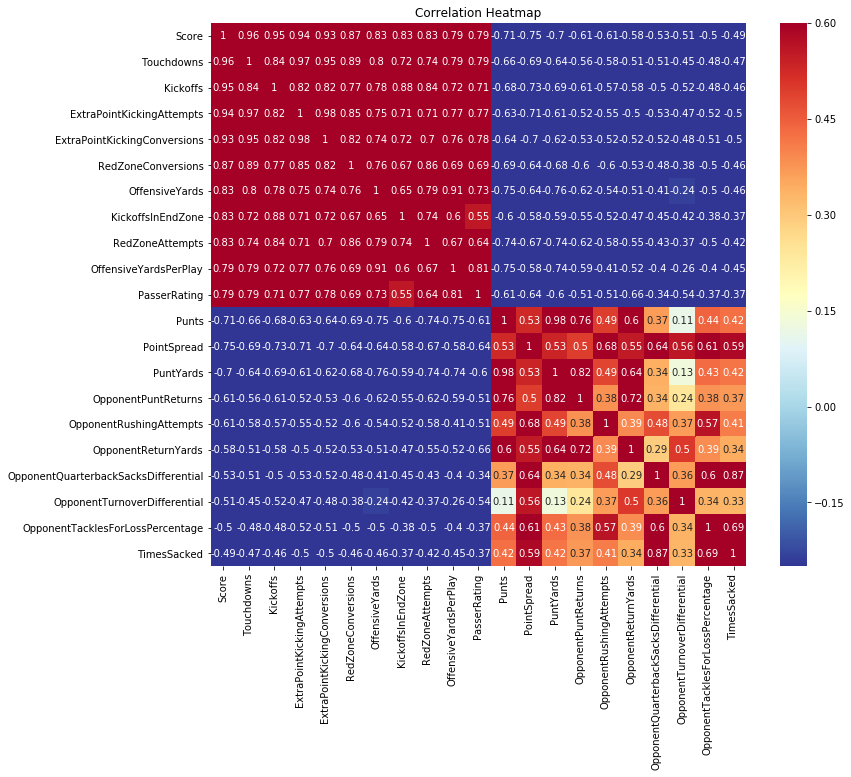

In [23]:
## create df with corr specific features

dfcorr = result[['Score','Touchdowns', 'Kickoffs' ,'ExtraPointKickingAttempts', 
                'ExtraPointKickingConversions', 'RedZoneConversions','OffensiveYards',
                'KickoffsInEndZone','RedZoneAttempts', 'OffensiveYardsPerPlay', 'PasserRating',
                'Punts','PointSpread','PuntYards','OpponentPuntReturns','OpponentRushingAttempts',
                'OpponentReturnYards','OpponentQuarterbackSacksDifferential','OpponentTurnoverDifferential',
                'OpponentTacklesForLossPercentage','TimesSacked']]

## created correlations
ext_data_corrs = dfcorr.corr()

## prepare plot
plt.figure(figsize = (12, 10))

## Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

# Now that we know the attributes that correlate negatively and postively to Score, we can create a more informed regression model

In [88]:
#file input
learning = result

#features as identified in correlation excercise 
feature_cols = ['Touchdowns', 'Kickoffs' ,'ExtraPointKickingAttempts', 
                'ExtraPointKickingConversions', 'RedZoneConversions','OffensiveYards',
                'KickoffsInEndZone','RedZoneAttempts', 'OffensiveYardsPerPlay', 'PasserRating',
                'Punts','PointSpread','PuntYards','OpponentPuntReturns','OpponentRushingAttempts',
                'OpponentReturnYards','OpponentQuarterbackSacksDifferential','OpponentTurnoverDifferential',
                'OpponentTacklesForLossPercentage','TimesSacked']


#feature harness
X = learning.loc[:, feature_cols]

#target harness
Y = learning.Score

#model fit
model = LinearRegression()
model.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Next, we'll evaluate the model with standard metrics to see how accurate it is

In [89]:
#https://machinelearningmastery.com/metrics-evaluate-machine-learning-algorithms-python/
# Cross Validation Regression MAE
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = LinearRegression()
scoring = 'neg_mean_absolute_error'
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("MAE: %.3f (%.3f)" % (results.mean(), results.std()))

# Cross Validation Regression MSE
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = LinearRegression()
scoring = 'neg_mean_squared_error'
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("MSE: %.3f (%.3f)" % (results.mean(), results.std()))

# Cross Validation Regression R^2
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = LinearRegression()
scoring = 'r2'
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("R^2: %.3f (%.3f)" % (results.mean(), results.std()))

MAE: -4.909 (0.881)
MSE: -34.435 (14.381)
R^2: 0.991 (0.005)


# We can test our model by using 2019 info 

In [95]:
#file input
learning = result

#features as identified in correlation excercise 
feature_cols = ['Touchdowns', 'Kickoffs' ,'ExtraPointKickingAttempts', 
                'ExtraPointKickingConversions', 'RedZoneConversions','OffensiveYards',
                'KickoffsInEndZone','RedZoneAttempts', 'OffensiveYardsPerPlay', 'PasserRating',
                'Punts','PointSpread','PuntYards','OpponentPuntReturns','OpponentRushingAttempts',
                'OpponentReturnYards','OpponentQuarterbackSacksDifferential','OpponentTurnoverDifferential',
                'OpponentTacklesForLossPercentage','TimesSacked']


#feature harness
X = learning.loc[:, feature_cols]

#target harness
Y = learning.Score

#model fit
model = LinearRegression()
model.fit(X, Y)

# filter to 2019 season in result set

df2019a = result.loc[result['Season'] == 2019]

# filter to columns that fit with the model

df2019b = df2019a[['Touchdowns', 'Kickoffs' ,'ExtraPointKickingAttempts', 
                'ExtraPointKickingConversions', 'RedZoneConversions','OffensiveYards',
                'KickoffsInEndZone','RedZoneAttempts', 'OffensiveYardsPerPlay', 'PasserRating',
                'Punts','PointSpread','PuntYards','OpponentPuntReturns','OpponentRushingAttempts',
                'OpponentReturnYards','OpponentQuarterbackSacksDifferential','OpponentTurnoverDifferential',
                'OpponentTacklesForLossPercentage','TimesSacked']]


# set up model harness for X
Xnew = df2019b.values

# set up model harness for Y
ynew = model.predict(Xnew)

print(ynew)

[358.3970182  381.02527571 530.70598661 320.18243645 332.4308682
 279.57110717 272.89738204 339.30808536 431.42120682 284.31997612
 342.27917895 371.42914035 385.89610377 357.63266843 296.72955805
 449.95250055 332.74021867 396.68533661 318.50231815 308.4975296
 408.29321436 423.80737143 454.98216273 342.82683103 278.99474804
 386.69433273 294.87338166 407.16447886 475.83065723 457.69215681
 406.96019278 270.44613539]


# Lets merge our predictions back with our base data so we can compare actual 2019 results vs what our model predicted 

In [96]:
## concatenate predictions to original data set

df2019a['prediction'] = ynew

## filter to Team, Original Score, and Predicit

df2019c = df2019a[['Team','Score','prediction']]

##

print(df2019c)


   Team  Score  prediction
0   ARI    361  358.397018
1   ATL    381  381.025276
2   BAL    531  530.705987
3   BUF    314  320.182436
4   CAR    340  332.430868
5   CHI    280  279.571107
6   CIN    279  272.897382
7   CLE    335  339.308085
8   DAL    434  431.421207
9   DEN    282  284.319976
10  DET    341  342.279179
11   GB    376  371.429140
12  HOU    378  385.896104
13  IND    361  357.632668
14  JAX    300  296.729558
15   KC    451  449.952501
16  LAC    337  332.740219
17  LAR    394  396.685337
18   LV    313  318.502318
19  MIA    306  308.497530
20  MIN    407  408.293214
21   NE    420  423.807371
22   NO    458  454.982163
23  NYG    341  342.826831
24  NYJ    276  278.994748
25  PHI    385  386.694333
26  PIT    289  294.873382
27  SEA    405  407.164479
28   SF    479  475.830657
29   TB    458  457.692157
30  TEN    402  406.960193
31  WAS    266  270.446135


# Now that we have a model established, let's look at taking one week of data and see how we can use it to make yearly predictions .. 

In [131]:
# get data

##create time variables
year = str('2017')

week = str('1')

##create key variable
key = str('1f1d70692bf443f2bb64f367f0a14ff1')

##create requests for all historical data
res_week = requests.get("https://api.sportsdata.io/v3/nfl/scores/json/TeamGameStats/" + year + "/" + week + "?key="+key+"").json()

##normalizae the json responses 
df_week = json_normalize(res_week)

##number of print choices to confirm 
#print(df_week.info())
#print(df_week.describe())
print(df_week.head())
#print(df_week.columns.tolist()) #this prints all columns names

     GameKey                 Date  SeasonType  Season  Week Team Opponent  \
0  201710111  2017-09-10T13:00:00           1    2017     1  ARI      DET   
1  201710106  2017-09-10T13:00:00           1    2017     1  ATL      CHI   
2  201710107  2017-09-10T13:00:00           1    2017     1  BAL      CIN   
3  201710104  2017-09-10T13:00:00           1    2017     1  BUF      NYJ   
4  201710131  2017-09-10T16:25:00           1    2017     1  CAR       SF   

  HomeOrAway  Score  OpponentScore  TotalScore             Stadium  \
0       AWAY     23             35          58          Ford Field   
1       AWAY     23             17          40       Soldier Field   
2       AWAY     20              0          20  Paul Brown Stadium   
3       HOME     21             12          33       New Era Field   
4       AWAY     23              3          26      Levi's Stadium   

  PlayingSurface  Temperature  Humidity  WindSpeed  OverUnder  PointSpread  \
0           Dome           63        4

# Now that we have the TeamGames data for Week 1 of 2017, we can extrapolate those numbers for an entire season ...

In [142]:
# filter to feature/target fields as defined in the model 

df_week1 = df_week[['Score','Team','Touchdowns', 'Kickoffs' ,'ExtraPointKickingAttempts', 
                'ExtraPointKickingConversions', 'RedZoneConversions','OffensiveYards',
                'KickoffsInEndZone','RedZoneAttempts', 'OffensiveYardsPerPlay', 'PasserRating',
                'Punts','PointSpread','PuntYards','OpponentPuntReturns','OpponentRushingAttempts',
                'OpponentReturnYards','OpponentQuarterbackSacksDifferential','OpponentTurnoverDifferential',
                'OpponentTacklesForLossPercentage','TimesSacked']]

#multiply all one week results by 16 as a rudimentary way to extrapolate performance across the whole season

df_week2 = df_week1[['Score','Touchdowns', 'Kickoffs' ,'ExtraPointKickingAttempts', 
                'ExtraPointKickingConversions', 'RedZoneConversions','OffensiveYards',
                'KickoffsInEndZone','RedZoneAttempts', 'OffensiveYardsPerPlay', 'PasserRating',
                'Punts','PointSpread','PuntYards','OpponentPuntReturns','OpponentRushingAttempts',
                'OpponentReturnYards','OpponentQuarterbackSacksDifferential','OpponentTurnoverDifferential',
                'OpponentTacklesForLossPercentage','TimesSacked']].multiply(16, axis="index")

# merge multiplied frame with original frame

df_week2['Team'] = df_week1['Team']

# print
print(df_week2)

    Score  Touchdowns  Kickoffs  ExtraPointKickingAttempts  \
0     368          48        80                         32   
1     368          32        96                         32   
2     320          32        80                         32   
3     336          48        64                         48   
4     368          32        80                         32   
5     272          32        64                         32   
6       0           0        16                          0   
7     288          32        64                         16   
8     304          16        96                         16   
9     384          48        80                         48   
10    560          80        96                         32   
11    272          32        64                         32   
12    112          16        32                         16   
13    144          16        64                         16   
14    464          48       112                         48   
15    67

# Now that we've prepared the weekly data to match the shape of our yearly model, we can make predicitions based off of this new data !

In [141]:
#file input
learning = result

#features as identified in correlation excercise 
feature_cols = ['Touchdowns', 'Kickoffs' ,'ExtraPointKickingAttempts', 
                'ExtraPointKickingConversions', 'RedZoneConversions','OffensiveYards',
                'KickoffsInEndZone','RedZoneAttempts', 'OffensiveYardsPerPlay', 'PasserRating',
                'Punts','PointSpread','PuntYards','OpponentPuntReturns','OpponentRushingAttempts',
                'OpponentReturnYards','OpponentQuarterbackSacksDifferential','OpponentTurnoverDifferential',
                'OpponentTacklesForLossPercentage','TimesSacked']


#feature harness
X = learning.loc[:, feature_cols]

#target harness
Y = learning.Score

#model fit
model = LinearRegression()
model.fit(X, Y)


# filter to columns that fit with the model

df_week3 = df_week2[['Touchdowns', 'Kickoffs' ,'ExtraPointKickingAttempts', 
                'ExtraPointKickingConversions', 'RedZoneConversions','OffensiveYards',
                'KickoffsInEndZone','RedZoneAttempts', 'OffensiveYardsPerPlay', 'PasserRating',
                'Punts','PointSpread','PuntYards','OpponentPuntReturns','OpponentRushingAttempts',
                'OpponentReturnYards','OpponentQuarterbackSacksDifferential','OpponentTurnoverDifferential',
                'OpponentTacklesForLossPercentage','TimesSacked']]


# set up model harness for X
Xnew = df_week3.values

# set up model harness for Y
ynew = model.predict(Xnew)

print(ynew)


[ 743.72509971  884.30291047  649.7938395   788.97441423  641.10748666
  611.12536686  373.80781512  515.82093384  726.28611562  732.15618334
  880.81139733  637.37293073  378.16917405  591.02821834  747.11079221
 1191.74833608  606.6556986  1101.43816024  728.82785245  994.2892237
  879.31309816  694.74870493  384.40617826  460.48505186  803.81454871
  759.35512914  504.38593061  344.70793502  700.01443711  627.58108068]


# It's great to see some output, but let's merge our predictions back to our reference data so we can see which teams are poised to score big, based on 1 week of results 

In [139]:
## concatenate predictions to original data set

df_week2['prediction'] = ynew

## filter to Team, Original Score, and Predicit

df_week4 = df_week2[['Team','Score','prediction']]

##

print(df_week4.sort_values(by='prediction', ascending=False))

   Team  Score   prediction
15   KC    672  1191.748336
17  LAR    736  1101.438160
19  MIN    464   994.289224
1   ATL    368   884.302910
10  DET    560   880.811397
20   NE    432   879.313098
24  PHI    480   803.814549
3   BUF    336   788.974414
25  PIT    336   759.355129
14  JAX    464   747.110792
0   ARI    368   743.725100
9   DEN    384   732.156183
18   LV    416   728.827852
8   DAL    304   726.286116
28  TEN    256   700.014437
21   NO    304   694.748705
2   BAL    320   649.793840
4   CAR    368   641.107487
11   GB    272   637.372931
29  WAS    272   627.581081
5   CHI    272   611.125367
16  LAC    336   606.655699
13  IND    144   591.028218
7   CLE    288   515.820934
26  SEA    144   504.385931
23  NYJ    192   460.485052
22  NYG     48   384.406178
12  HOU    112   378.169174
6   CIN      0   373.807815
27   SF     48   344.707935


# The prediction values here are relative, but using this predicted value to "rank" teams is a great way to create a data informed power ranking system that can change as new data is added every week 

# If we look at the playoff bracket from 2017 below we can see that many of the teams at the top of our "power rankings", based on our model, made it deep into the playoffs - All of our top 10 teams, except for Detroit, made the playoffs in 2017, and our no. 7 team, Philadelphia, wound up winning the whole thing!

![title](img/playoffbracket2017.png)